Imports des bibliothèques et connexion à MongoDB

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from pymongo import MongoClient
from data.config_mongo import MDB_CONNECTION, MDB_BASE, MDB_COLLECTION
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from collections import Counter
import ast

# Connexion à MongoDB
client = MongoClient(MDB_CONNECTION) 
db = client[MDB_BASE]
collection = db[MDB_COLLECTION]

Extraction des documents MongoDB et conversion en df pandas

In [3]:
data = list(collection.find())
df = pd.DataFrame(data)
df.head(10)

,_id,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,68fb394c51973a6d75a736bc,5114,Fullmetal Alchemist: Brotherhood,tv,9.10,2037075,finished_airing,64.0,2009-04-05,2010-07-04,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,68fb394c51973a6d75a736bd,11061,Hunter x Hunter (2011),tv,9.04,1671587,finished_airing,148.0,2011-10-02,2014-09-24,...,"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,NaN,https://cdn.myanimelist.net/images/anime/1337/...,https://myanimelist.net/anime/11061/Hunter_x_H...,https://www.youtube.com/watch?v=D9iTQRB4XRk,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,68fb394c51973a6d75a736be,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.05,1491491,finished_airing,10.0,2019-04-29,2019-07-01,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://cdn.myanimelist.net/images/anime/1517/...,https://myanimelist.net/anime/38524/Shingeki_n...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,[]
3,68fb394c51973a6d75a736bf,9253,Steins;Gate,tv,9.07,1348232,finished_airing,24.0,2011-04-06,2011-09-14,...,"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' vi...,https://cdn.myanimelist.net/images/anime/1935/...,https://myanimelist.net/anime/9253/Steins_Gate,https://www.youtube.com/watch?v=27OZc-ku6is,Steins;Gate,STEINS;GATE,[]
4,68fb394c51973a6d75a736c0,28851,Koe no Katachi,movie,8.94,1540277,finished_airing,1.0,2016-09-17,2016-09-17,...,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Koe no Katachi won the following awards: Japan...,https://cdn.myanimelist.net/images/anime/1122/...,https://myanimelist.net/anime/28851/Koe_no_Kat...,https://www.youtube.com/watch?v=XBNWo25izJ8,A Silent Voice,聲の形,['The Shape of Voice']
5,68fb394c51973a6d75a736c1,32281,Kimi no Na wa.,movie,8.84,1825476,finished_airing,1.0,2016-08-26,2016-08-26,...,"['Toho', 'Sound Team Don Juan', 'Amuse', 'JR E...","['Funimation', 'NYAV Post']","Mitsuha Miyamizu, a high school girl, yearns t...",Kimi no Na wa. won the LAFCA Animation Award i...,https://cdn.myanimelist.net/images/anime/5/870...,https://myanimelist.net/anime/32281/Kimi_no_Na_wa,https://www.youtube.com/watch?v=3KR8_igDs1Y,Your Name.,君の名は。,[]
6,68fb394c51973a6d75a736c2,2904,Code Geass: Hangyaku no Lelouch R2,tv,8.91,1154270,finished_airing,25.0,2008-04-06,2008-09-28,...,"['Bandai Visual', 'Mainichi Broadcasting Syste...","['Funimation', 'Bandai Entertainment']","One year has passed since the Black Rebellion,...",Code Geass: Hangyaku no Lelouch R2 is an origi...,https://cdn.myanimelist.net/images/anime/1088/...,https://myanimelist.net/anime/2904/Code_Geass_...,NaN,Code Geass: Lelouch of the Rebellion R2,コードギアス 反逆のルルーシュ 続編,"['Code Geass: Hangyaku no Lelouch 2nd Season',..."
7,68fb394c51973a6d75a736c3,40028,Shingeki no Kyojin: The Final Season,tv,8.80,1237778,finished_airing,16.0,2020-12-07,2021-03-29,...,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Gabi Braun and Falco Grice have been training ...,Shingeki no Kyojin: The Final Season adapts co...,https://cdn.myanimelist.net/images/anime/1000/...,https://myanimelist.net/anime/40028/Shingeki_n...,https://www.you

Créer une copie du df

In [4]:
df_copy = df.copy()

Observer le nombres de colonnes, le nombre de lignes, le nombre de valeurs non-nulles et le Dtype des variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               24985 non-null  object 
 1   anime_id          24985 non-null  int64  
 2   title             24985 non-null  object 
 3   type              24927 non-null  object 
 4   score             16050 non-null  float64
 5   scored_by         24985 non-null  int64  
 6   status            24985 non-null  object 
 7   episodes          24438 non-null  float64
 8   start_date        24110 non-null  object 
 9   end_date          22215 non-null  object 
 10  source            21424 non-null  object 
 11  members           24985 non-null  int64  
 12  favorites         24985 non-null  int64  
 13  episode_duration  24387 non-null  object 
 14  total_duration    24162 non-null  object 
 15  rating            24405 non-null  object 
 16  sfw               24985 non-null  bool  

Somme et pourcentage des données mannquantes pour chaque colonne

In [6]:
missing_data = pd.DataFrame({
    'valeurs manquantes': df.isnull().sum(),
    '% manquantes': df.isnull().sum() / len(df) * 100
})

print(missing_data)

                  valeurs manquantes  % manquantes
_id                                0      0.000000
anime_id                           0      0.000000
title                              0      0.000000
type                              58      0.232139
score                           8935     35.761457
scored_by                          0      0.000000
status                             0      0.000000
episodes                         547      2.189314
start_date                       875      3.502101
end_date                        2770     11.086652
source                          3561     14.252552
members                            0      0.000000
favorites                          0      0.000000
episode_duration                 598      2.393436
total_duration                   823      3.293976
rating                           580      2.321393
sfw                                0      0.000000
approved                           0      0.000000
created_at                     

Visualiser le heatmap des données manquantes

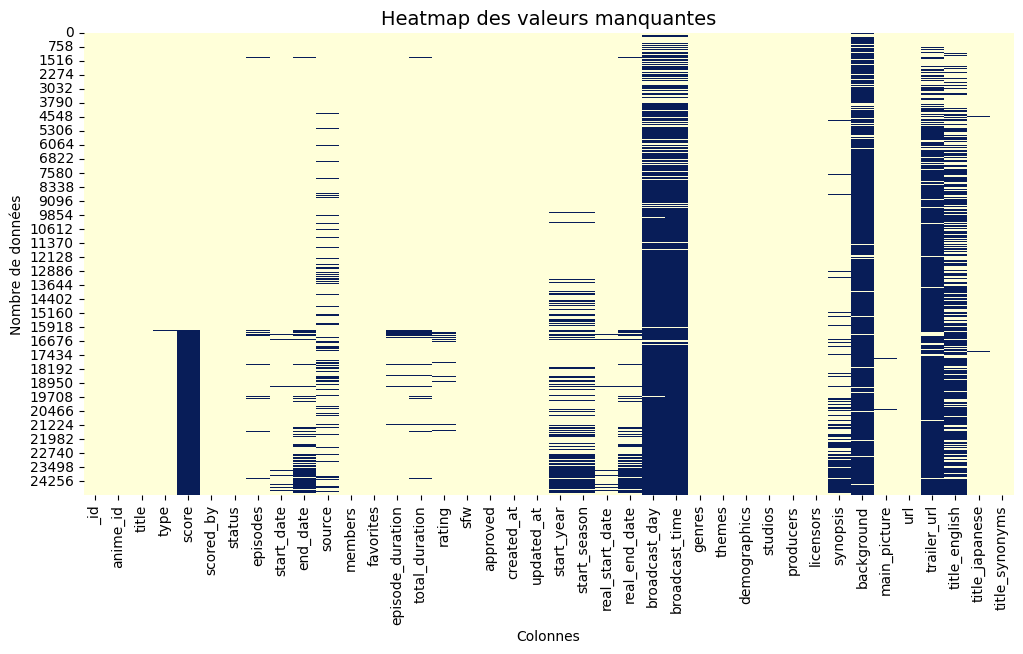

In [8]:
# Taille de la figure
plt.figure(figsize=(12, 6))

# Création de la heatmap
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=False) 

# Titre et axes
plt.title("Heatmap des valeurs manquantes", fontsize=14)
plt.xlabel("Colonnes")
plt.ylabel("Nombre de données")
plt.show()

Voir les données uniques pour chaque colonne

In [13]:
for col in df.columns:
    print(f"{col} :")       
    print(df[col].unique())

_id :
[ObjectId('68fb394c51973a6d75a736bc') ObjectId('68fb394c51973a6d75a736bd')
 ObjectId('68fb394c51973a6d75a736be') ...
 ObjectId('68fb394c51973a6d75a79852') ObjectId('68fb394c51973a6d75a79853')
 ObjectId('68fb394c51973a6d75a79854')]
anime_id :
[ 5114 11061 38524 ... 56107 56168 56202]
title :
['Fullmetal Alchemist: Brotherhood' 'Hunter x Hunter (2011)'
 'Shingeki no Kyojin Season 3 Part 2' ... 'Kaijuu Sekai Seifuku'
 'Yotsukado no Melody' 'Ame to Kusari']
type :
['tv' 'movie' 'ona' 'ova' 'special' 'music' nan]
score :
[9.1  9.04 9.05 9.07 8.94 8.84 8.91 8.8  8.78 8.7  8.62 8.63 8.65 8.54
 8.75 8.79 8.67 8.5  8.51 8.74 8.66 8.61 8.93 8.64 8.77 8.6  8.49 8.44
 8.57 8.55 8.58 8.41 8.69 8.35 8.56 8.34 8.31 8.87 8.37 8.36 8.26 8.29
 8.33 8.23 8.81 8.45 8.53 8.24 8.39 8.28 8.47 8.32 8.43 8.25 8.83 8.48
 8.76 8.46 8.42 8.72 8.2  8.3  9.06 8.89 8.21 8.15 8.11 8.19 8.16 8.71
 8.22 8.38 8.14 9.   8.08 8.09 8.17 8.06 8.1  8.04 8.88 8.27 8.68 7.99
 8.52 8.07 8.01 9.03 8.   7.95 7.97 8.02 8.03 

Visualisation de certaines colonnes 

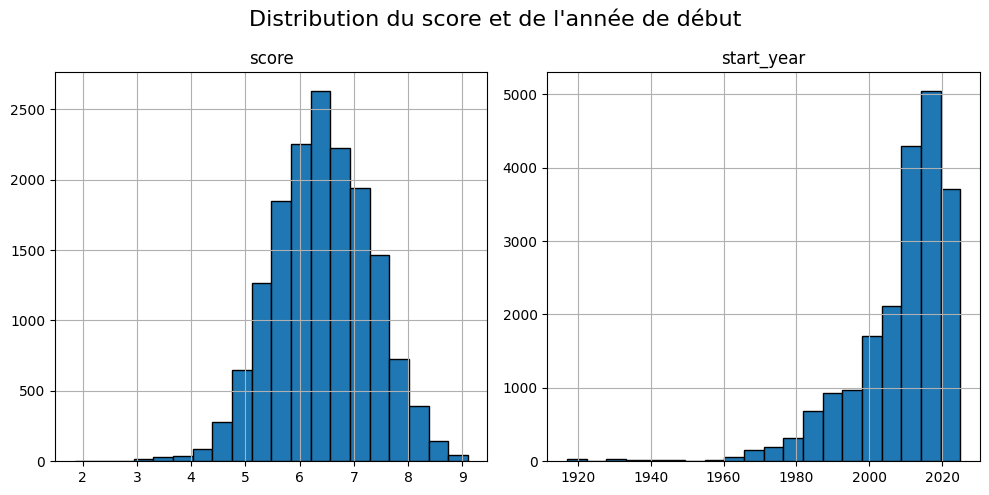

Nombre total d'épisodes : 363,576
Nombre d'animés recensés : 24438
Moyenne d'épisodes par animé : 14.9


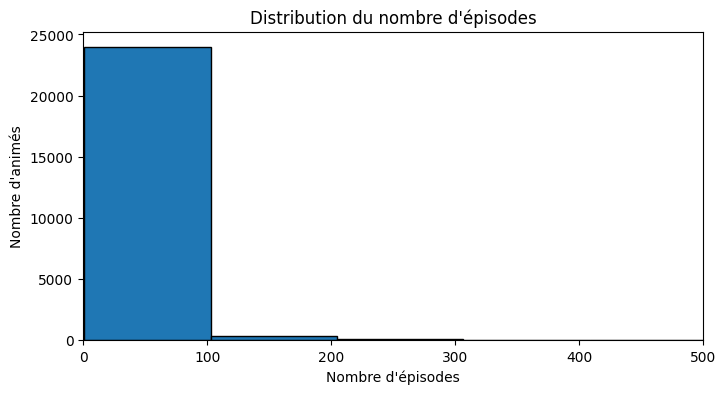

In [ ]:
# Sélection des colonnes à afficher dans les histogrammes
colonnes_a_tracer = ['score', 'start_year']

# Création des histogrammes
df[colonnes_a_tracer].hist(figsize=(10, 5), bins=20, edgecolor='black')
plt.suptitle("Distribution du score et de l'année de début", fontsize=16)
plt.tight_layout()
plt.show()

# Affichage du nombre d'épisodes total et de quelques stats
if 'episodes' in df.columns:
    nb_total_episodes = df['episodes'].sum(skipna=True)
    nb_animes = df['episodes'].count()
    moyenne_episodes = df['episodes'].mean()
    print(f"Nombre total d'épisodes : {nb_total_episodes:,.0f}")
    print(f"Nombre d'animés recensés : {nb_animes}")
    print(f"Moyenne d'épisodes par animé : {moyenne_episodes:.1f}")

    # Affichage d’un histogramme pour les épisodes
    plt.figure(figsize=(8,4))
    plt.hist(df['episodes'].dropna(), bins=30, edgecolor='black')
    plt.title("Distribution du nombre d'épisodes")
    plt.xlabel("Nombre d'épisodes")
    plt.ylabel("Nombre d'animés")
    plt.xlim(0, 500)
    plt.show()
else:
    print("La colonne 'episodes' n'existe pas dans le df")


Nombre d'animés par statut

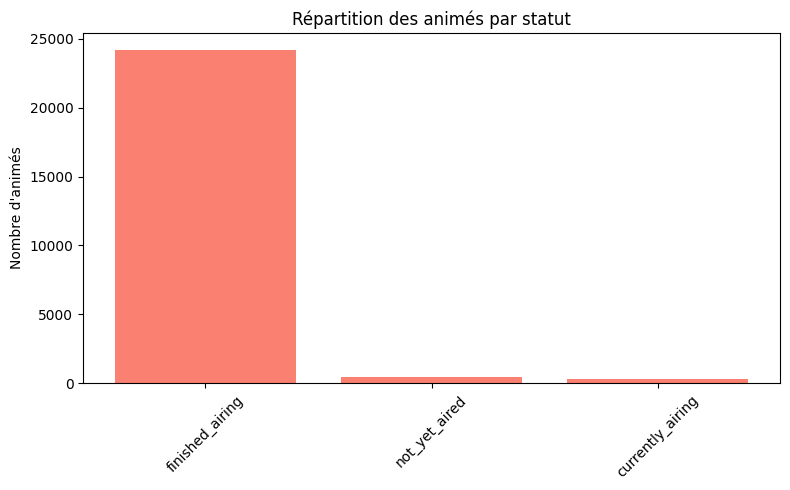

In [19]:
# Agrégation : compter les animés par statut
pipeline = [
    {"$group": {"_id": "$status", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]
results = list(collection.aggregate(pipeline))

# Préparation des données
statuses = [doc["_id"] for doc in results]
counts = [doc["count"] for doc in results]

# Affichage du graphique
plt.figure(figsize=(8, 5))
plt.bar(statuses, counts, color="salmon")
plt.ylabel("Nombre d'animés")
plt.title("Répartition des animés par statut")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nombre d'animés par studio

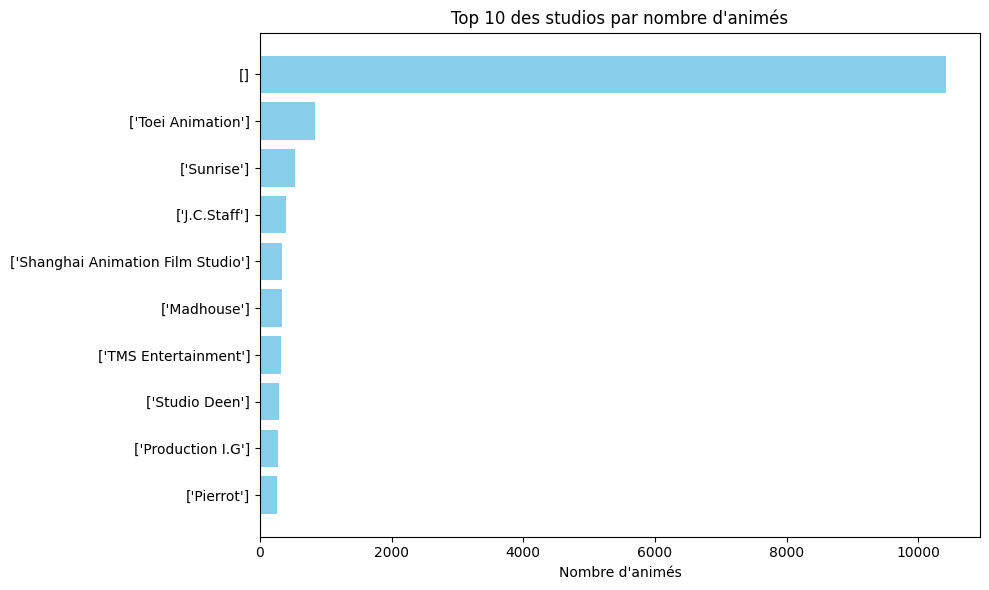

In [25]:
# Agrégation : compter les animés par studio
pipeline = [
    {"$unwind": "$studios"},
    {"$match": {"studios": {"$ne": None, "$ne": ""}}},
    {"$group": {"_id": "$studios", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$limit": 10} # Top 10 des studios
]
results = list(collection.aggregate(pipeline))

# Préparation des données pour le graphique
studios = [doc["_id"] for doc in results]
counts = [doc["count"] for doc in results]

# for doc in results:
#     print(doc)

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.barh(studios[::-1], counts[::-1], color="skyblue")
plt.xlabel("Nombre d'animés")
plt.title("Top 10 des studios par nombre d'animés")
plt.tight_layout()
plt.show()

Combien d'animés avec le champ studios présent mais vide (=liste vide : [ ]) ?

In [ ]:
# Cas où studios existe mais est vide
cursor = collection.find({"studios": {"$exists": True}})
for doc in cursor.limit(5):
    pprint.pprint(doc["studios"])

# Studios absent
absent = collection.count_documents({"studios": {"$exists": False}})

# Studios = None
none_value = collection.count_documents({"studios": None})

# Studios = liste vide
empty_list = collection.count_documents({"studios": {"$type": "array", "$size": 0}})

# Studios = liste avec objets sans nom
no_name = collection.count_documents({
    "studios": {"$elemMatch": {"name": None}}
})

print(f"Studios absents : {absent}")
print(f"Studios = None : {none_value}")
print(f"Studios = [] : {empty_list}")
print(f"Studios avec name=None : {no_name}")


"['Bones']"
"['Madhouse']"
"['Wit Studio']"
"['White Fox']"
"['Kyoto Animation']"
Studios absents : 0
Studios = None : 0
Studios = [] : 0
Studios avec name=None : 0


(visiblement, les studios sont encodés comme des chaînes de caractères, pas de vraies listes Python, d'où les résultats : Studios absents : 0, Studios = None : 0, Studios = [] : 0, Studios avec name=None : 0)

In [29]:
doc = collection.find_one({"studios": {"$exists": True}})
print(type(doc["studios"]))


<class 'str'>


Détecter les chaînes vides ou "[ ]"

In [ ]:
empty_string_list = collection.count_documents({"studios": "[]"})
print(f"Studios = '[]' (chaîne vide) : {empty_string_list}")

Studios = '[]' (chaîne vide) : 10418


Transformation des chaînes en vraies listes avant visualisation

In [31]:
# Récupérer tous les studios
cursor = collection.find({"studios": {"$exists": True}})
studio_counter = Counter()

for doc in cursor:
    raw = doc["studios"]
    try:
        # Convertir la chaîne en liste Python
        studios = ast.literal_eval(raw) if isinstance(raw, str) else raw
        # Compter chaque studio
        for studio in studios:
            if studio and isinstance(studio, str):
                studio_counter[studio.strip()] += 1
    except Exception as e:
        print(f"Erreur avec studios={raw} : {e}")

Afficher le top 10 des studios en graphique

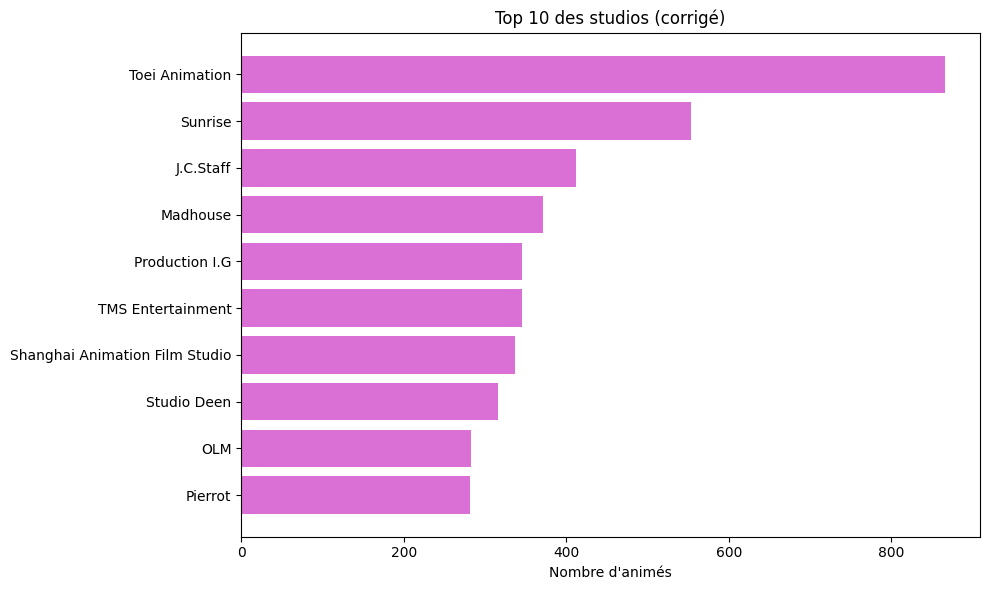

In [32]:
top_studios = studio_counter.most_common(10)
labels, values = zip(*top_studios)

plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], values[::-1], color="orchid")
plt.xlabel("Nombre d'animés")
plt.title("Top 10 des studios (corrigé)")
plt.tight_layout()
plt.show()
